In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'tableau-colorblind10'])

In [4]:
import os
os.chdir("/g/data/jr19/rh2942/text-empathy/")

# GPT annotaion consistency

In [4]:
prev = pd.read_csv('./data/different-WS23-train-gpt.tsv', sep='\t')

In [9]:
prev_anno = prev['empathy'].dropna().tolist()

In [10]:
len(prev_anno)

21

In [11]:
latest = pd.read_csv('./data/WS23-train-gpt.tsv', sep='\t')

In [12]:
latest_anno = latest['empathy'].dropna().tolist()

In [13]:
len(latest_anno)

779

In [14]:
latest_anno = latest_anno[:len(prev_anno)]

In [15]:
len(latest_anno)

21

In [19]:
np.array(prev_anno) - np.array(latest_anno)

array([ 0. ,  0. ,  0. , -0.3,  0.3,  0.9,  0. ,  0. ,  0. , -0.3,  1. ,
       -1.7, -0.3,  0. , -0.3,  0. , -0.3, -0.3,  0. , -0.3, -0.3])

# Crowd vs GPT

In [12]:
data = pd.read_csv('./data/WS22-WS23-sep-from-aug-train-gpt.tsv', sep='\t')

In [13]:
diff = data['empathy'] - data['wrong_empathy']

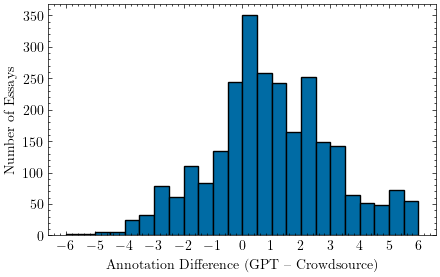

In [55]:
bins = np.arange(-6, 6.5, 0.5)
_, ax = plt.subplots(figsize=(5,3))
ax.hist(diff, bins=bins, edgecolor='black')
ax.set_xlabel('Annotation Difference (GPT -- Crowdsource)')
ax.set_ylabel('Number of Essays')
_ = ax.set_xticks(np.arange(-6, 6.5, 1))
plt.savefig(fname='./tmp/annotation-difference.pdf', format='pdf', bbox_inches='tight')

# Annotation difference

## WS23

In [85]:
ws23 = pd.read_csv('./ws23-val_results_diff_seed_anno_diff.tsv', sep='\t', index_col=0)

In [86]:
ws23

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,0.792,0.790,0.770,0.707,0.730,0.662,0.524,0.546,0.478,0.486,0.394,0.571,0.514
42,0.785,0.782,0.769,0.735,0.732,0.658,0.538,0.505,0.477,0.469,0.409,0.634,0.628
100,0.778,0.807,0.768,0.731,0.732,0.659,0.544,0.494,0.485,0.461,0.433,0.616,0.638
999,0.803,0.811,0.737,0.723,0.708,0.668,0.532,0.474,0.555,0.444,0.382,0.640,0.558
1234,0.796,0.811,0.750,0.715,0.702,0.658,0.550,0.488,0.517,0.501,0.449,0.537,0.641


In [7]:
ws23['6.0'].min()

0.514

In [9]:
ws23.max().max()

0.811

In [88]:
ws23['6.0'].mean(), ws23['6.0'].std()

(0.5958, 0.05696665691437403)

## WS22

In [10]:
ws22 = pd.read_csv('./ws22-val_results_diff_seed_anno_diff.tsv', sep='\t', index_col=0)

In [11]:
ws22

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,0.781,0.761,0.755,0.731,0.714,0.643,0.600,0.592,0.591,0.571,0.522,0.449,0.536
42,0.765,0.734,0.767,0.739,0.680,0.613,0.596,0.586,0.579,0.553,0.546,0.499,0.538
100,0.777,0.772,0.738,0.744,0.681,0.641,0.628,0.594,0.604,0.566,0.531,0.466,0.473
999,0.778,0.760,0.740,0.748,0.715,0.621,0.613,0.564,0.541,0.592,0.481,0.455,0.480
1234,0.780,0.777,0.764,0.728,0.705,0.628,0.607,0.605,0.597,0.577,0.531,0.501,0.494


In [12]:
ws22['6.0'].min()

0.473

In [13]:
ws22.max().max()

0.781

## WS21

In [34]:
ws21 = pd.read_csv('./ws21-kfold_results_anno_diff.tsv', sep='\t', index_col=0)

In [35]:
ws21

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,0.958,0.961,0.960,0.958,0.957,0.942,0.941,0.926,0.934,0.927,0.918,0.912,0.915
1,0.947,0.944,0.946,0.950,0.943,0.938,0.907,0.896,0.907,0.902,0.878,0.895,0.907
2,0.958,0.956,0.957,0.956,0.955,0.934,0.930,0.918,0.918,0.905,0.900,0.901,0.895
3,0.958,0.958,0.952,0.959,0.955,0.948,0.937,0.932,0.934,0.926,0.924,0.911,0.920
4,0.959,0.954,0.958,0.955,0.951,0.940,0.932,0.914,0.913,0.912,0.897,0.913,0.903
5,0.967,0.969,0.962,0.955,0.958,0.921,0.936,0.936,0.933,0.933,0.926,0.925,0.918
6,0.957,0.952,0.962,0.956,0.957,0.952,0.953,0.949,0.946,0.936,0.938,0.925,0.924
7,0.959,0.954,0.957,0.957,0.943,0.941,0.936,0.916,0.926,0.919,0.923,0.890,0.911
8,0.961,0.959,0.961,0.954,0.946,0.942,0.942,0.923,0.920,0.915,0.912,0.918,0.914
9,0.961,0.962,0.948,0.947,0.952,0.940,0.932,0.915,0.915,0.910,0.904,0.886,0.882


In [36]:
ws21['6.0'].min()

0.882

In [37]:
ws21.max().max()

0.969

In [38]:
avg_ws23 = ws23.mean()
std_ws23 = ws23.std()
avg_ws22 = ws22.mean()
std_ws22 = ws22.std()
avg_ws21 = ws21.mean()
std_ws21 = ws21.std()

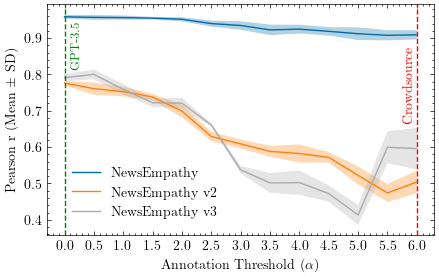

In [84]:
_, ax = plt.subplots(figsize=(5,3))

ax.plot(avg_ws21, label='NewsEmpathy')
# Plot the shaded area representing the standard deviations
ax.fill_between(avg_ws21.index, avg_ws21 - std_ws21, avg_ws21 + std_ws21, alpha=0.3)

ax.plot(avg_ws22, label='NewsEmpathy v2')
# Plot the shaded area representing the standard deviations
ax.fill_between(avg_ws22.index, avg_ws22 - std_ws22, avg_ws22 + std_ws22, alpha=0.3)

ax.plot(avg_ws23, label='NewsEmpathy v3')
# Plot the shaded area representing the standard deviations
ax.fill_between(avg_ws23.index, avg_ws23 - std_ws23, avg_ws23 + std_ws23, alpha=0.3)

# Adding labels and title
ax.set_xlabel(r'Annotation Selection Threshold ($\alpha$)')
ax.set_ylabel(r'Pearson r (Mean $\pm$ SD)')
_ = ax.legend(loc=(0.05,0.05))

ax.axvline(x=0, color='green', linestyle='--')
ax.text(0.2, 0.818, 'GPT-3.5', color='green', rotation=90, fontsize=9)

ax.axvline(x=len(avg_ws23) - 1, color='red', linestyle='--')
ax.text(11.5, 0.67, 'Crowdsource', color='red', rotation=90, fontsize=10)

plt.savefig(fname='./tmp/pearson-vs-alpha.pdf', format='pdf', bbox_inches='tight')